In [73]:
import pandas as pd
import numpy as np

import scipy.stats as stats     #To draw the QQ plot    

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [74]:
df = sns.load_dataset('titanic')

In [75]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [76]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [77]:
df.drop(columns=[ 'pclass', 'sex', 'sibsp', 'parch',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],inplace=True)

In [78]:
df.head(2)

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [79]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [88]:
x=df.iloc[:,1:3]
y=df.iloc[:,0:1]
#x constains age, fare and y contains survived

## Since there are nan values in age column we impute with mean

In [89]:
df.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

In [87]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_11060\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


## Train test split


In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

## Now we look the distribution of age column using histplot with kde as true and QQ plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


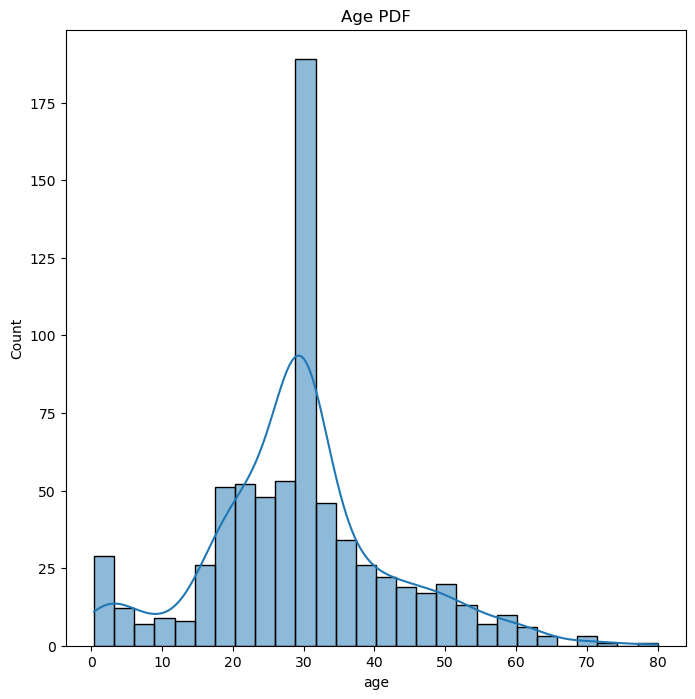

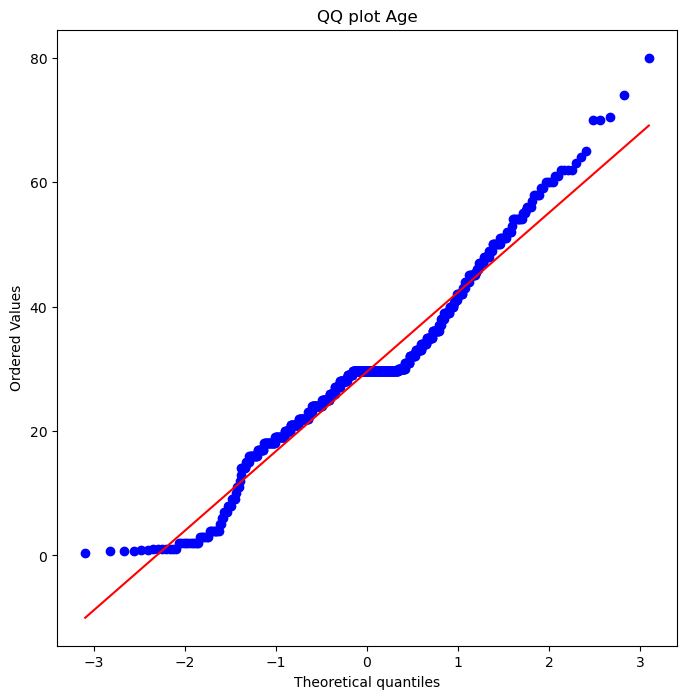

In [112]:
# To draw the distribution plot for the Age column to identify the distribution 
plt.figure(figsize=(8,8))
sns.histplot(data=x_train,x='age',kde=True)
plt.title('Age PDF')
plt.show()

# To draw the QQ plot for the Age columnto identify the distribution 
plt.figure(figsize=(8,8))
stats.probplot(x_train['age'],dist='norm',plot=plt)
plt.title('QQ plot Age')

plt.show()

## Now we look the distribution of fare column using histplot with kde as true and QQ plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


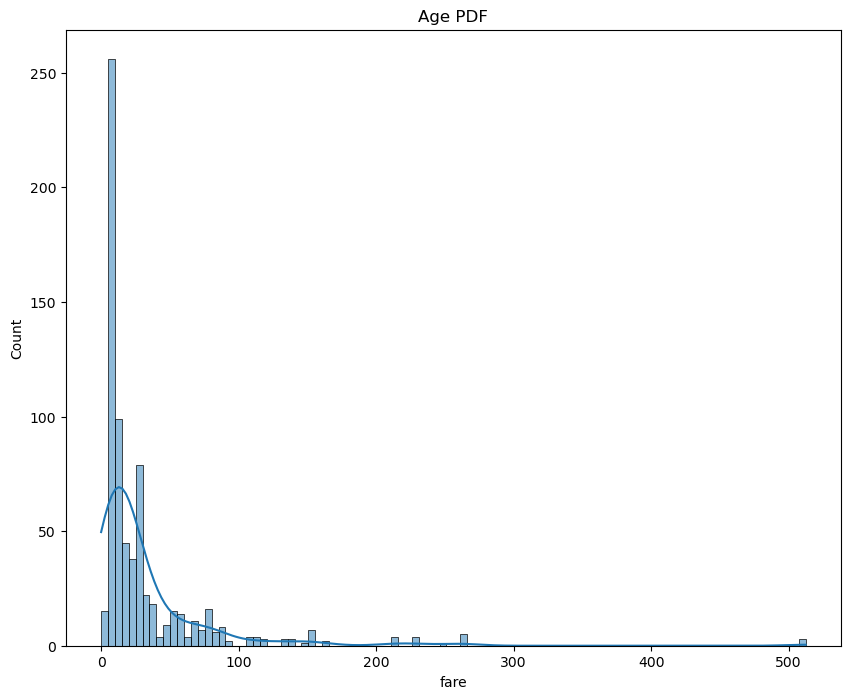

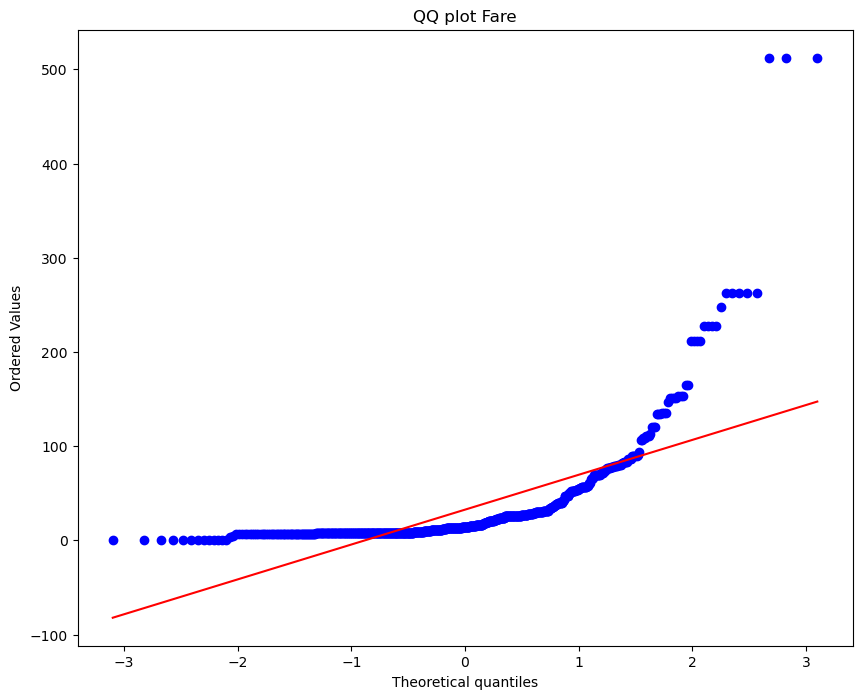

In [111]:
# To draw the distribution plot for the fA column to identify the distribution 
plt.figure(figsize=(10,8))
sns.histplot(data=x_train,x='fare',kde=True)
plt.title('Age PDF')
plt.show()

# To draw the QQ plot for the Fare columnto identify the distribution 
plt.figure(figsize=(10,8))
stats.probplot(x_train['fare'],dist='norm',plot=plt)
plt.title('QQ plot Fare')
plt.show()